In [ ]:
!pip install qiskit
!pip install pylatexenc
!pip install qiskit_aer

In [ ]:
import numpy as np
import pandas as pd
import random as rn
from qiskit import *
from qiskit.visualization import *
from qiskit.quantum_info import *
from qiskit_aer import AerSimulator

## Some useful functions


In [ ]:
# Function for plotting the quantum circuit
def qplot(qc):
    return qc.draw('mpl', scale=0.8, initial_state= True, fold=-1)

def latex(quantum_state):
  return Statevector(quantum_state).draw('latex')

## Function for converting Qiskit result to hidden string

In [ ]:
def BV_string_finder(counts: dict):
  counts_list = list(counts.keys())[0]
  counts_reversed = counts_list[::-1]
  return counts_reversed[:-1]

# Brenstien-Vazirani Algorithm

how you can use oracles class for this algorithm

### Step 1: Clone the repository
'!git clone https://github.com/emad-boosari/Quantum-Algorithms.git'

### Step 2: Navigate to the cloned directory
'%cd Quantum-Algorithms'

### Step 3: Install dependencies (if necessary)
'!pip install qiskit'

### Step 4: Import the oracle class
'from oracles import BV'  # Make sure this matches your repository structure

In [ ]:
from oracles import BVOracle

In [ ]:
# Length of the hidden string which is exactly equal to the number of qubits
num_qubits = 4

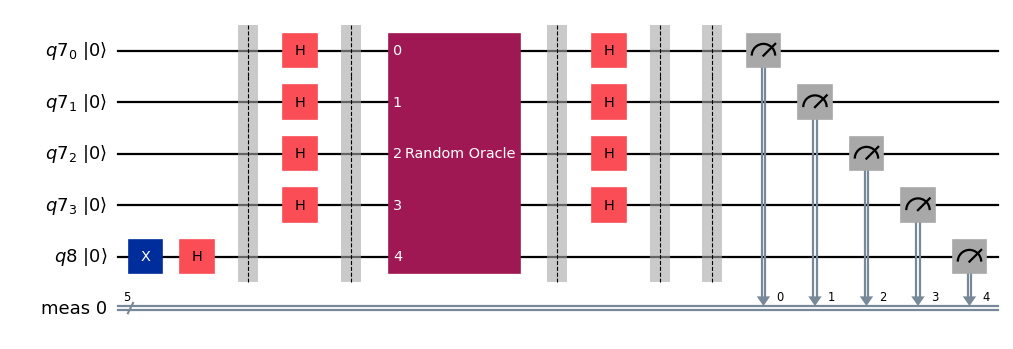

In [ ]:
q_reg = QuantumRegister(num_qubits) # Main register Input qubits
a_reg = QuantumRegister(1)          # Ancillary register with only one qubit
# Building the QuantumCircuit
qc = QuantumCircuit(q_reg, a_reg)

# preparing the ancilla qubit in the state $|->$
qc.x(a_reg)
qc.h(a_reg)
qc.barrier()

# preparing uniform superposition in the
qc.h(q_reg)
qc.barrier()

# Applying the Brenstein-Vazirani oracle to the circuit
bv_oracle = BVOracle(num_qubits=4, hidden_string = 'random')
oracle = bv_oracle.create_oracle()

# Appending the oracle to the circuit
qc.append(oracle, [i for i in range(num_qubits+1) ])
qc.barrier()
############## final Hadard gates
qc.h(q_reg)
qc.barrier()
########### Measurement
qc.measure_all()

qplot(qc)

In [ ]:
simulator = AerSimulator()
job = simulator.run(transpile(qc, simulator), shots=1)
result = job.result()
counts = result.get_counts()
counts

{'10011': 1}

In [ ]:
# For finding the exact hidden string we can use the following function
BV_string_finder(counts)

'1100'

In [ ]:
# In the BVOracle, we can check whenever the original hidden string with the result comes from quantum circuit
bv_oracle.get_hidden_string()

'1100'